[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.283s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.173603
[t-SNE] KL divergence after 1550 iterations: 0.872008


Text(0.5, 1.0, 'Actual cluster')

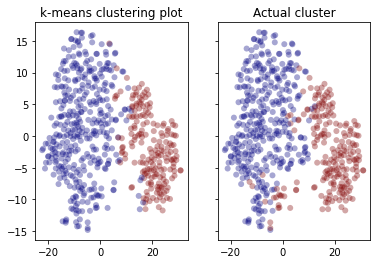

In [1]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
from sklearn import preprocessing

df = pd.read_csv("./data.csv")
df.head(100)

df = df.drop('id',axis=1)
df = df.drop('Unnamed: 32',axis=1)
#Mapping Benign to 0 and Malignant to 1
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
#Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(df.iloc[:,1:32]))
datas.columns = list(df.iloc[:,1:32].columns)
datas['diagnosis'] = df['diagnosis']
#Creating the high diamensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values
#Creating a 2D visualization to visualize the cluster

from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter=4000)
Y = tsne.fit_transform(X)

from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++',n_init=50,max_iter=300,tol=0.0001)
kY = kmns.fit_predict(X)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(Y[:,0],Y[:,1], c = kY, cmap = "jet",edgecolor="None", alpha=0.35)
ax1.set_title('k-means clustering plot')
ax2.scatter(Y[:,0],Y[:,1], c = datas['diagnosis'], cmap = "jet",edgecolor="None", alpha=0.35)
ax2.set_title('Actual cluster')


Text(0.5, 1.0, 'Actual cluster')

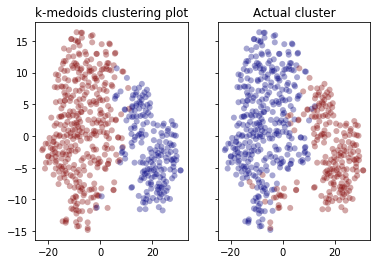

In [2]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0)
kY = kmedoids.fit_predict(X)

f,(ax1,ax2) = plt.subplots(1,2,sharey=True)   

ax1.scatter(Y[:,0],Y[:,1], c = kY, cmap = "jet",edgecolor="None", alpha=0.35)
ax1.set_title('k-medoids clustering plot')
ax2.scatter(Y[:,0],Y[:,1], c = datas['diagnosis'], cmap = "jet",edgecolor="None", alpha=0.35)
ax2.set_title('Actual cluster')

Text(0.5, 1.0, 'Actual clusters')

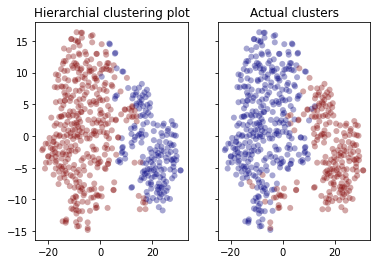

In [7]:
from sklearn.cluster import AgglomerativeClustering

aggC = AgglomerativeClustering(n_clusters = 2,linkage='ward')
kY = aggC.fit_predict(X)

f,(ax1,ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1], c=kY,cmap = "jet",edgecolor = "None", alpha=0.35)
ax1.set_title('Hierarchial clustering plot')

ax2.scatter(Y[:,0],Y[:,1], c = datas['diagnosis'], cmap = "jet", edgecolor="None", alpha=0.35)
ax2.set_title('Actual clusters')
